<a href="https://colab.research.google.com/github/SauloHenriqueAguiar/pHSensor/blob/main/validacaosensorPH.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [71]:
import pandas as pd 
read_file = pd.read_excel ("/content/dadosvalidacaosensorPH.xlsx")

In [72]:
read_file.to_csv ("/content/dadosvalidacaosensorPH.csv",  
                  index = None, 
                  header=True)

In [73]:
df = pd.DataFrame(pd.read_csv("/content/dadosvalidacaosensorPH.csv"))

In [74]:
df

,indice,pH_Meio_Aquoso,pH_Medicao_Direta_Akso,pH_ESP_vali(equa_linear)
0,1,6.70,6.80,6.74
1,2,7.20,7.15,7.90
2,3,7.40,7.37,6.78
3,4,7.20,6.84,7.15
4,5,4.30,4.60,4.26
5,6,7.30,6.95,6.41
6,7,7.50,7.30,6.85
7,8,7.00,7.02,7.87
8,9,4.60,4.83,5.24
9,10,5.10,5.36,5.21


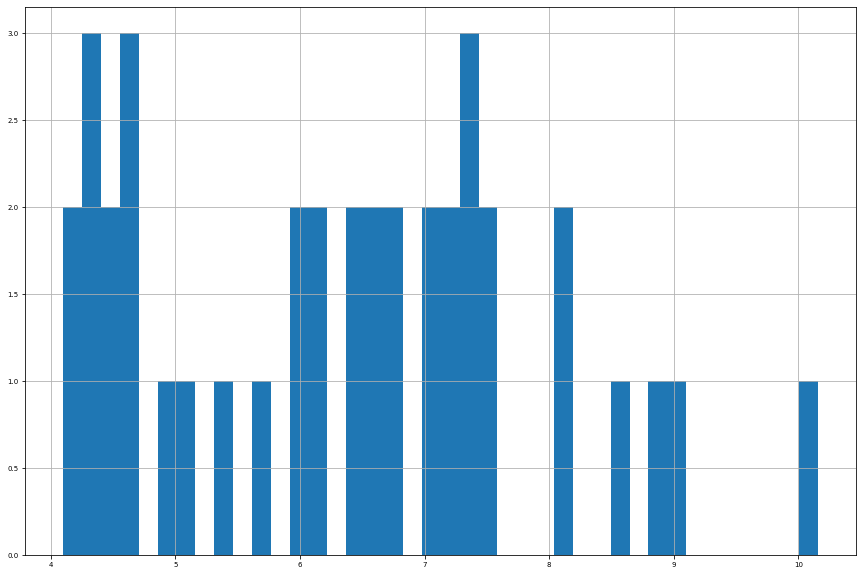

In [75]:
import matplotlib.pyplot as plt

df['pH_Meio_Aquoso'].hist(bins=40)
plt.tight_layout()
plt.show()

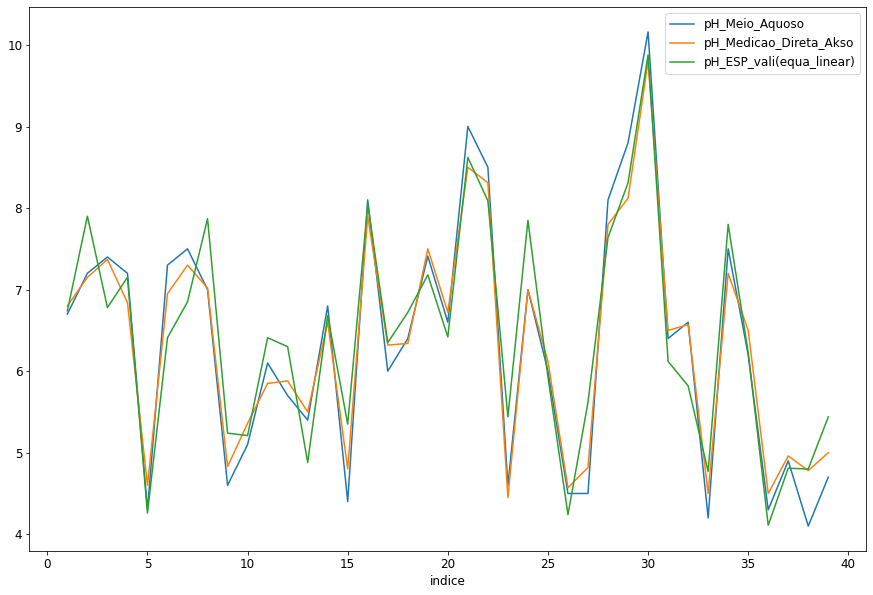

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setup matplotlib
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)
# Create an axes object 
axes = plt.gca()

#gráfico temperatura x pH
# pass the axes object to plot function
df.plot(kind='line', x='indice', y='pH_Meio_Aquoso', ax=axes);
df.plot(kind='line', x='indice', y='pH_Medicao_Direta_Akso', ax=axes);
df.plot(kind='line', x='indice', y='pH_ESP_vali(equa_linear)', ax=axes);

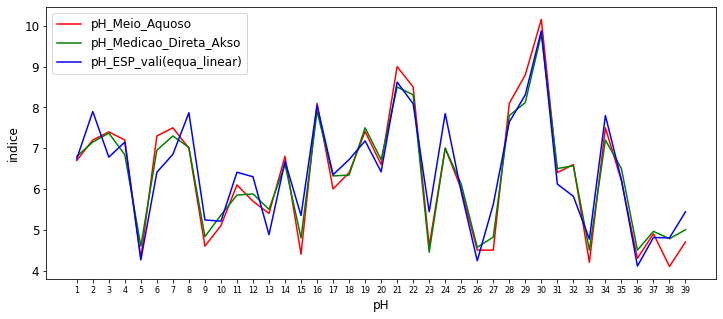

In [77]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 5
#df = pd.read_excel(file_location).ffill()
sns.lineplot(x=df['indice'].astype(str),
             y=df['pH_Meio_Aquoso'],color='r')
sns.lineplot(x=df['indice'].astype(str),
             y=df['pH_Medicao_Direta_Akso'],color='g')
sns.lineplot(x=df['indice'].astype(str),
             y=df['pH_ESP_vali(equa_linear)'],color='b')

plt.legend(['pH_Meio_Aquoso','pH_Medicao_Direta_Akso','pH_ESP_vali(equa_linear)'])
plt.ylabel('indice')
plt.xlabel('pH')
plt.tick_params(axis='x',labelsize=8)

##  pH aquoso x pH Esp

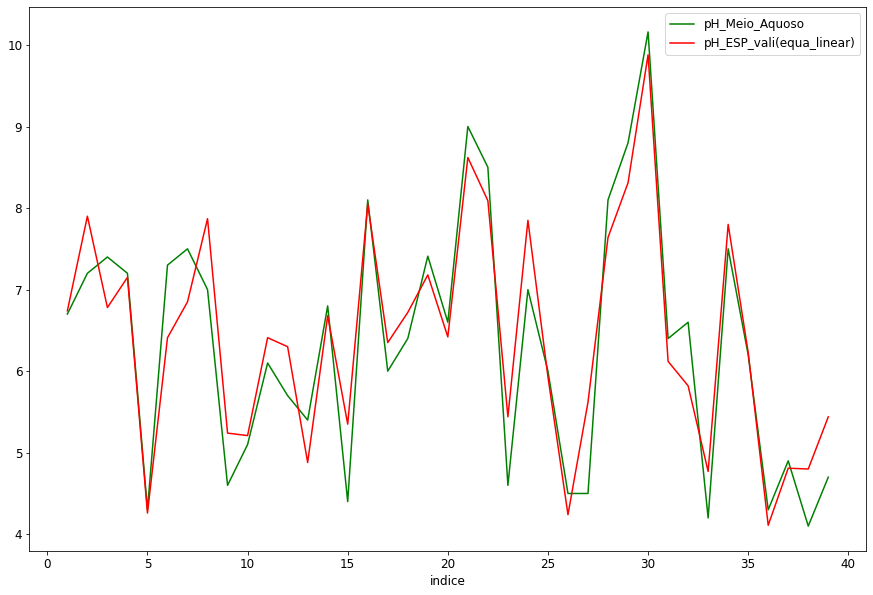

In [78]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)
# Create an axes object 
axes = plt.gca()

#gráfico temperatura x pH
# pass the axes object to plot function
df.plot(kind='line', x='indice', y='pH_Meio_Aquoso', ax=axes,color='g');
df.plot(kind='line', x='indice', y='pH_ESP_vali(equa_linear)',color='r', ax=axes);

## pH akso x pH Esp

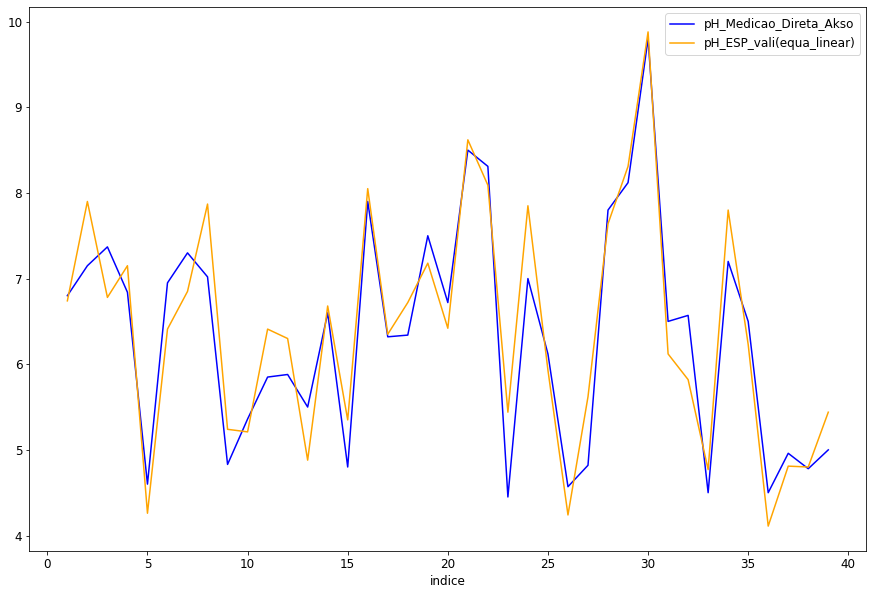

In [79]:
plt.rcParams.update({'font.size': 12})
plt.rcParams["figure.figsize"] = (15,10)
# Create an axes object 
axes = plt.gca()

#gráfico temperatura x pH
# pass the axes object to plot function
df.plot(kind='line', x='indice', y='pH_Medicao_Direta_Akso', ax=axes,color='blue');
df.plot(kind='line', x='indice', y='pH_ESP_vali(equa_linear)', ax=axes,color='orange');

### Correlação de Pearson entre pH aquoso x pH Esp

In [80]:
import numpy as np
corr = np.corrcoef(df['pH_Meio_Aquoso'], df['pH_ESP_vali(equa_linear)'])
print(corr)

[[1.         0.93983829]
 [0.93983829 1.        ]]


### Correlação de Pearson entre pH akson x pH Esp

In [81]:
import numpy as np
corr = np.corrcoef(df['pH_Medicao_Direta_Akso'], df['pH_ESP_vali(equa_linear)'])
print(corr)

[[1.         0.94083688]
 [0.94083688 1.        ]]


##Analises de ruidos(diferenças)

In [82]:
df['dif_pH_esp'] = df['pH_ESP_vali(equa_linear)'].diff()
df['dif_pH_akso'] = df['pH_Medicao_Direta_Akso'].diff()
df['dif_pH_aquoso'] = df['pH_Meio_Aquoso'].diff()


df

,indice,pH_Meio_Aquoso,pH_Medicao_Direta_Akso,pH_ESP_vali(equa_linear),dif_pH_esp,dif_pH_akso,dif_pH_aquoso
0,1,6.70,6.80,6.74,NaN,NaN,NaN
1,2,7.20,7.15,7.90,1.16,0.35,0.50
2,3,7.40,7.37,6.78,-1.12,0.22,0.20
3,4,7.20,6.84,7.15,0.37,-0.53,-0.20
4,5,4.30,4.60,4.26,-2.89,-2.24,-2.90
5,6,7.30,6.95,6.41,2.15,2.35,3.00
6,7,7.50,7.30,6.85,0.44,0.35,0.20
7,8,7.00,7.02,7.87,1.02,-0.28,-0.50
8,9,4.60,4.83,5.24,-2.63,-2.19,-2.40
9,10,5.10,5.36,5.21,-0.03,0.53,0.50


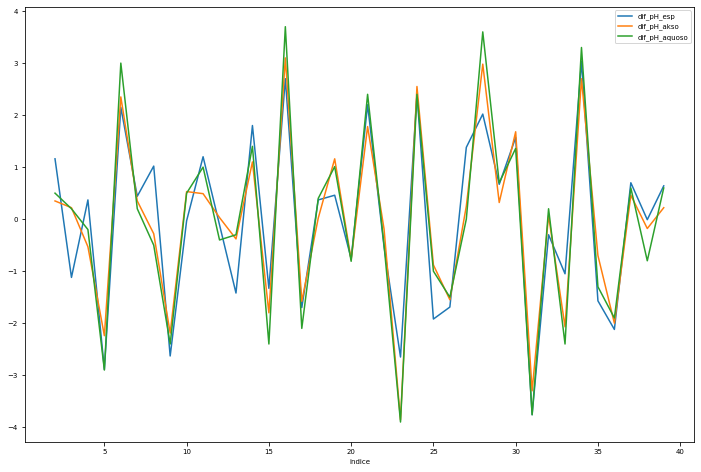

In [83]:
plt.rcParams.update({'font.size': 7})
plt.rcParams["figure.figsize"] = (12,8)
# Create an axes object 
axes = plt.gca()



df.plot(kind='line', x='indice', y='dif_pH_esp', ax=axes);
df.plot(kind='line', x='indice', y='dif_pH_akso', ax=axes);
df.plot(kind='line', x='indice', y='dif_pH_aquoso', ax=axes);

#Calculando o MSE
O Erro Quadrado Médio (MSE) ou Desvio Quadrado Médio (MSD) de um estimador mede a média dos quadrados do erro, ou seja, a diferença quadrada média entre os valores estimados e o valor verdadeiro. É uma função de risco, correspondente ao valor esperado da perda de erro ao quadrado. É sempre não – negativo e valores próximos de zero são melhores.

In [84]:
from sklearn.metrics import mean_squared_error

###MSE entre pH Aquosox pH Esp

In [85]:
# Given values
Y_trueaquo = df['pH_Meio_Aquoso']  # Y_true = Y (original values)

# calculated values
Y_predaquo = df['pH_ESP_vali(equa_linear)']  # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_trueaquo,Y_predaquo)

0.28234358974358975

###MSE entre pHAkso x pH Esp

In [86]:
Y_trueak = df['pH_Medicao_Direta_Akso']  # Y_true = Y (original values)

# calculated values
Y_predak = df['pH_ESP_vali(equa_linear)']  # Y_pred = Y'

# Calculation of Mean Squared Error (MSE)
mean_squared_error(Y_trueak,Y_predak)

0.21221538461538464

##Calculando o MAE
O erro absoluto médio mede as diferenças médias entre os valores previstos e os valores reais. O erro absoluto médio pode ajudar a medir a precisão de um determinado modelo. quanto mais próximo o valor do MAE estiver de 0, melhor. Digamos que você tenha um MAE de 10. Isso significa que, em média, o MAE está 10 longe do valor previsto.

In [87]:
#Defining MAPE function
def MAPE(Y_actual,Y_Predicted):
    mape = np.mean(np.abs((Y_actual - Y_Predicted)/Y_actual))*100
    return mape

###MAE entre pH aquoso x pH ESP

In [88]:
from sklearn.metrics import mean_absolute_error

trueaquo = df['pH_Meio_Aquoso']
predictedaquo = df['pH_ESP_vali(equa_linear)']

print(mean_absolute_error(trueaquo, predictedaquo))

0.4379487179487179


###MAE entre pH Akso x pH ESP

In [89]:
from sklearn.metrics import mean_absolute_error

trueaks = df['pH_Medicao_Direta_Akso']
predictedaks = df['pH_ESP_vali(equa_linear)']

print(mean_absolute_error(trueaks, predictedaks))

0.3861538461538461


##Diferença Percentual Absoluta(MAPE)
O MAPE (Erro Absoluto Médio Percentual) mede o erro em porcentagem. O erro médio absoluto percentual (MAPE) expressa precisão como uma porcentagem do erro. Como o MAPE é uma porcentagem, pode ser mais fácil de entender do que as outras estatísticas de medida de precisão. Por exemplo, se o MAPE é 5, em média, a previsão está incorreta em 5%. O erro percentual absoluto médio (MAPE — do inglês Mean Absolute Percentual Error) é uma métrica que mostra a porcentagem de erro em relação aos valores reais. Na equação 4 representa o cálculo de MAPE que basicamente se parece com MAE, mas com o acréscimo de uma divisão por |y|. Então se o resultado de MAPE for igual a 40% significa que o nosso modelo faz previsões que em média a diferença entre o valor previsto e o real equivale a 40% do valor real tanto para mais quanto para menos.

###MAPE pH aquoso x pH ESP

In [90]:
LR_MAPE= MAPE(trueaquo,predictedaquo)
print("MAPE: ",LR_MAPE)

MAPE:  7.542618783390663


###MAPE pH akso x pH ESP

In [91]:
# Using MAPE error metrics to check for the error rate and accuracy level
LR_MAPE= MAPE(trueaks,predictedaks)
print("MAPE: ",LR_MAPE)

MAPE:  6.503205513856399


#R-quadrado
R Squared é uma medida que informa até que ponto a proporção da variância na variável dependente é explicada pela variância nas variáveis ​​independentes. Em termos mais simples, enquanto os coeficientes estimam tendências, o R-quadrado representa a dispersão ao redor da linha de melhor ajuste.

Por exemplo, se o R² for 0,80, então 80% da variação pode ser explicada pelas entradas do modelo.

Se o R² for 1,0 ou 100%, significa que todos os movimentos da variável dependente podem ser inteiramente explicados pelos movimentos das variáveis ​​independentes.

###R² pH aquo x pH Esp

In [92]:
import sklearn
from sklearn.metrics import r2_score
sklearn.metrics.r2_score(trueaquo,predictedaquo)

0.8772535454863866

###R² pH(antimonio)xpH(aquoso)

In [93]:
sklearn.metrics.r2_score(trueaks,predictedaks)

0.8760754341338849